In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import scipy


In [ ]:
df=pd.read_csv("traindata.csv")

In [ ]:
df.head()


,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-05-15,312000.0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,2014-11-14,310000.0,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,2014-12-24,320000.0,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,2015-02-22,264500.0,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,2015-01-06,700000.0,3,2,True,341.88304,False,False,False,3,False,False,1,4


Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13603 entries, 0 to 13602
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               13603 non-null  object 
 1   price              13603 non-null  float64
 2   bedrooms           13603 non-null  int64  
 3   grade              13603 non-null  int64  
 4   has_basement       13603 non-null  bool   
 5   living_in_m2       13603 non-null  float64
 6   renovated          13603 non-null  bool   
 7   nice_view          13603 non-null  bool   
 8   perfect_condition  13603 non-null  bool   
 9   real_bathrooms     13603 non-null  int64  
 10  has_lavatory       13603 non-null  bool   
 11  single_floor       13603 non-null  bool   
 12  month              13603 non-null  int64  
 13  quartile_zone      13603 non-null  int64  
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 930.0+ KB


Removing unneccesary columns

In [ ]:
df.drop("grade",axis=1,inplace=True)
df.drop("date",axis=1,inplace=True)
df.drop("month",axis=1,inplace=True)
df.drop("quartile_zone",axis=1,inplace=True)

In [ ]:
df

,price,bedrooms,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor
0,312000.0,2,True,138.42547,False,False,False,2,True,False
1,310000.0,2,False,105.90942,False,False,False,1,True,False
2,320000.0,2,False,117.98681,False,True,False,1,False,True
3,264500.0,2,False,151.43189,False,False,False,2,True,True
4,700000.0,3,True,341.88304,False,False,False,3,False,False
...,...,...,...,...,...,...,...,...,...,...
13598,353950.0,3,False,302.86378,False,False,False,2,True,False
13599,289950.0,2,False,155.14801,False,False,False,2,True,False
13600,625504.0,2,True,117.98681,False,False,False,2,True,False
13601,730000.0,3,False,340.02498,False,False,False,2,True,False


Converting data type of all boolean to integer

In [ ]:
df['has_basement']=df['has_basement'].astype(int)
df['renovated']=df['renovated'].astype(int)
df['nice_view']=df['nice_view'].astype(int)
df['perfect_condition']=df['perfect_condition'].astype(int)
df['has_lavatory']=df['has_lavatory'].astype(int)
df['single_floor']=df['single_floor'].astype(int)


In [ ]:
df

,price,bedrooms,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor
0,312000.0,2,1,138.42547,0,0,0,2,1,0
1,310000.0,2,0,105.90942,0,0,0,1,1,0
2,320000.0,2,0,117.98681,0,1,0,1,0,1
3,264500.0,2,0,151.43189,0,0,0,2,1,1
4,700000.0,3,1,341.88304,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...
13598,353950.0,3,0,302.86378,0,0,0,2,1,0
13599,289950.0,2,0,155.14801,0,0,0,2,1,0
13600,625504.0,2,1,117.98681,0,0,0,2,1,0
13601,730000.0,3,0,340.02498,0,0,0,2,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13603 entries, 0 to 13602
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              13603 non-null  float64
 1   bedrooms           13603 non-null  int64  
 2   has_basement       13603 non-null  int64  
 3   living_in_m2       13603 non-null  float64
 4   renovated          13603 non-null  int64  
 5   nice_view          13603 non-null  int64  
 6   perfect_condition  13603 non-null  int64  
 7   real_bathrooms     13603 non-null  int64  
 8   has_lavatory       13603 non-null  int64  
 9   single_floor       13603 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.0 MB


In [ ]:
z_scores = np.abs(scipy.stats.zscore(df['living_in_m2']))
outliers = df[z_scores > 3]
print(outliers)
print(outliers.count())


           price  bedrooms  has_basement  living_in_m2  renovated  nice_view  \
100    1040890.0         3             0     388.33454          0          0   
157     673200.0         3             0     388.33454          0          0   
158     988990.0         3             0     385.54745          0          0   
286     929000.0         3             0     385.54745          0          0   
1022    850000.0         3             1     390.19260          0          0   
1974    910000.0         3             1     389.26357          0          0   
2364   1080000.0         3             0     390.19260          0          0   
2643    635000.0         3             0     385.54745          0          0   
3099    623300.0         3             1     387.40551          0          0   
4215   1088000.0         3             0     387.40551          0          1   
4692    930800.0         3             0     385.54745          0          0   
6657   1150000.0         3             1

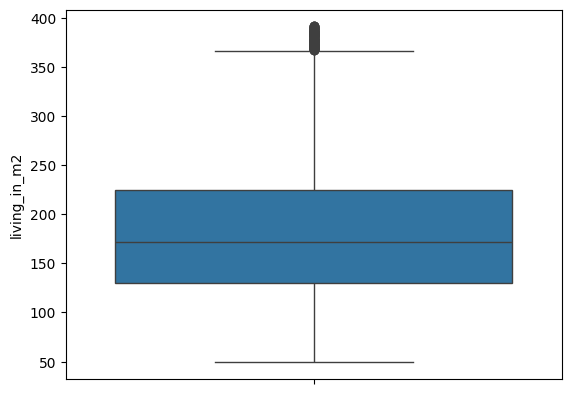

In [ ]:
sns.boxplot(data=df['living_in_m2'])
plt.show()

In [ ]:
df_no_outliers = df[(np.abs(scipy.stats.zscore(df['living_in_m2'])) < 3)]
df_no_outliers
df=df_no_outliers
df

,price,bedrooms,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor
0,312000.0,2,1,138.42547,0,0,0,2,1,0
1,310000.0,2,0,105.90942,0,0,0,1,1,0
2,320000.0,2,0,117.98681,0,1,0,1,0,1
3,264500.0,2,0,151.43189,0,0,0,2,1,1
4,700000.0,3,1,341.88304,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...
13598,353950.0,3,0,302.86378,0,0,0,2,1,0
13599,289950.0,2,0,155.14801,0,0,0,2,1,0
13600,625504.0,2,1,117.98681,0,0,0,2,1,0
13601,730000.0,3,0,340.02498,0,0,0,2,1,0


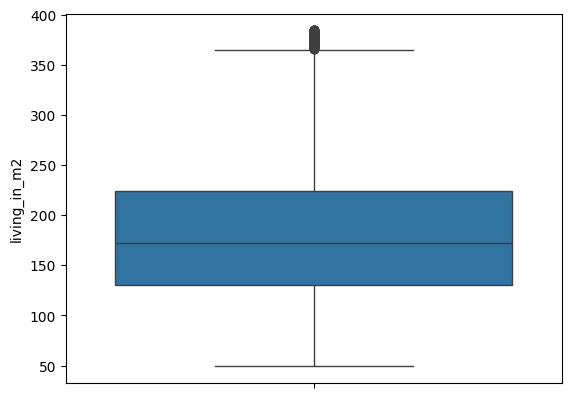

In [ ]:
sns.boxplot(data=df['living_in_m2'])
plt.show()

In [ ]:
a=np.array(df.columns)
a=list(a)
a

['price',
 'bedrooms',
 'has_basement',
 'living_in_m2',
 'renovated',
 'nice_view',
 'perfect_condition',
 'real_bathrooms',
 'has_lavatory',
 'single_floor']

In [ ]:
a.remove('price')

In [ ]:
a

['bedrooms',
 'has_basement',
 'living_in_m2',
 'renovated',
 'nice_view',
 'perfect_condition',
 'real_bathrooms',
 'has_lavatory',
 'single_floor']

In [ ]:
y=df["price"].values

In [ ]:
x=df.drop("price",axis=1).values

In [ ]:
x

array([[  2.     ,   1.     , 138.42547, ...,   2.     ,   1.     ,
          0.     ],
       [  2.     ,   0.     , 105.90942, ...,   1.     ,   1.     ,
          0.     ],
       [  2.     ,   0.     , 117.98681, ...,   1.     ,   0.     ,
          1.     ],
       ...,
       [  2.     ,   1.     , 117.98681, ...,   2.     ,   1.     ,
          0.     ],
       [  3.     ,   0.     , 340.02498, ...,   2.     ,   1.     ,
          0.     ],
       [  3.     ,   0.     , 220.18011, ...,   2.     ,   1.     ,
          0.     ]])

In [ ]:
y

array([312000., 310000., 320000., ..., 625504., 730000., 383000.])

In [ ]:
df.isna().sum()

,0
price,0
bedrooms,0
has_basement,0
living_in_m2,0
renovated,0
nice_view,0
perfect_condition,0
real_bathrooms,0
has_lavatory,0
single_floor,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
x_train

array([[  3.     ,   1.     , 188.59309, ...,   2.     ,   1.     ,
          1.     ],
       [  3.     ,   0.     , 209.03175, ...,   2.     ,   1.     ,
          0.     ],
       [  1.     ,   1.     , 170.94152, ...,   1.     ,   1.     ,
          1.     ],
       ...,
       [  3.     ,   1.     , 217.39302, ...,   2.     ,   1.     ,
          1.     ],
       [  1.     ,   1.     , 166.29637, ...,   1.     ,   0.     ,
          1.     ],
       [  2.     ,   0.     , 112.41263, ...,   1.     ,   1.     ,
          1.     ]])

In [ ]:
x_test

array([[  3.     ,   1.     , 209.03175, ...,   2.     ,   1.     ,
          1.     ],
       [  2.     ,   0.     , 166.29637, ...,   2.     ,   1.     ,
          0.     ],
       [  2.     ,   1.     , 161.65122, ...,   1.     ,   1.     ,
          1.     ],
       ...,
       [  2.     ,   1.     , 104.05136, ...,   1.     ,   0.     ,
          1.     ],
       [  3.     ,   0.     , 153.28995, ...,   1.     ,   1.     ,
          0.     ],
       [  3.     ,   1.     , 230.39944, ...,   2.     ,   1.     ,
          1.     ]])

In [ ]:
y_train

array([595000., 333490., 575000., ..., 475000., 710000., 570000.])

In [ ]:
y_test

array([305000., 515000., 364500., ..., 552000., 752000., 560000.])

In [ ]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_train

array([[595000.],
       [333490.],
       [575000.],
       ...,
       [475000.],
       [710000.],
       [570000.]])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)
y_train=sc_x.fit_transform(y_train)
y_test=sc_x.fit_transform(y_test)

In [ ]:
x_train

array([[ 1.12056333,  1.27571587,  0.10609559, ...,  0.51442806,
         0.68075594,  0.97747284],
       [ 1.12056333, -0.78387361,  0.41050532, ...,  0.51442806,
         0.68075594, -1.02304633],
       [-1.8206266 ,  1.27571587, -0.15680373, ..., -1.08475855,
         0.68075594,  0.97747284],
       ...,
       [ 1.12056333,  1.27571587,  0.53503658, ...,  0.51442806,
         0.68075594,  0.97747284],
       [-1.8206266 ,  1.27571587, -0.22598776, ..., -1.08475855,
        -1.46895523,  0.97747284],
       [-0.35003164, -0.78387361, -1.02852252, ..., -1.08475855,
         0.68075594,  0.97747284]])

In [ ]:
x_test

array([[ 1.11143091,  1.3199721 ,  0.409107  , ...,  0.52137332,
         0.69837673,  0.96554177],
       [-0.34207754, -0.75759177, -0.21718624, ...,  0.52137332,
         0.69837673, -1.03568797],
       [-0.34207754,  1.3199721 , -0.28526159, ..., -1.07327751,
         0.69837673,  0.96554177],
       ...,
       [-0.34207754,  1.3199721 , -1.12939596, ..., -1.07327751,
        -1.43189192,  0.96554177],
       [ 1.11143091, -0.75759177, -0.40779723, ..., -1.07327751,
         0.69837673, -1.03568797],
       [ 1.11143091,  1.3199721 ,  0.72225362, ...,  0.52137332,
         0.69837673,  0.96554177]])

In [ ]:
X_full = np.vstack([x_train, x_test])
y_full = np.vstack([y_train, y_test])

# Create DataFrame and add column names
df_full = pd.DataFrame(X_full,columns=a)
df_full['price'] = y_full

In [ ]:
df_full

,bedrooms,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,price
0,1.120563,1.275716,0.106096,-0.203246,-0.285995,-0.279106,0.514428,0.680756,0.977473,0.579534
1,1.120563,-0.783874,0.410505,-0.203246,-0.285995,-0.279106,0.514428,0.680756,-1.023046,-0.686908
2,-1.820627,1.275716,-0.156804,-0.203246,-0.285995,-0.279106,-1.084759,0.680756,0.977473,0.482678
3,-0.350032,-0.783874,-0.724113,-0.203246,-0.285995,-0.279106,-1.084759,-1.468955,0.977473,0.373715
4,1.120563,1.275716,-0.807134,-0.203246,-0.285995,-0.279106,-1.084759,0.680756,0.977473,-1.377695
...,...,...,...,...,...,...,...,...,...,...
13574,1.111431,-0.757592,0.912865,-0.195515,-0.293347,-0.297473,0.521373,0.698377,-1.035688,0.305592
13575,-0.342078,-0.757592,-0.135496,5.114685,-0.293347,-0.297473,-1.073278,0.698377,-1.035688,-0.688113
13576,-0.342078,1.319972,-1.129396,-0.195515,-0.293347,-0.297473,-1.073278,-1.431892,0.965542,0.387997
13577,1.111431,-0.757592,-0.407797,-0.195515,-0.293347,-0.297473,-1.073278,0.698377,-1.035688,1.357464


EDA

In [ ]:
df_nrml=df_full

In [ ]:
corelation=df_nrml.corr()

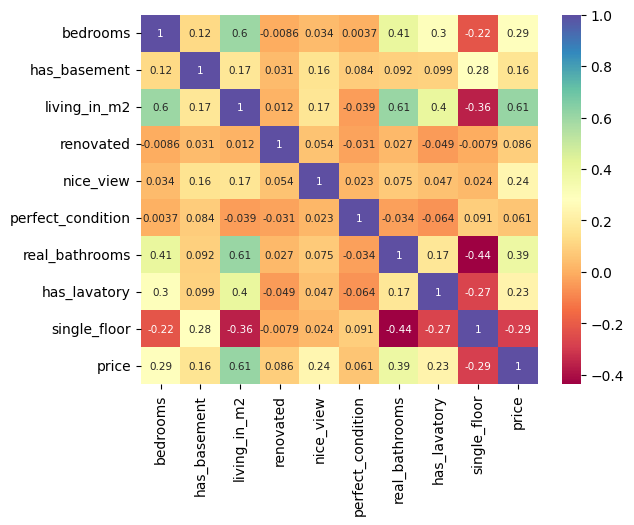

In [ ]:
sns.heatmap(corelation,annot=True,annot_kws={"size": 7.5},cmap='Spectral')
plt.show()

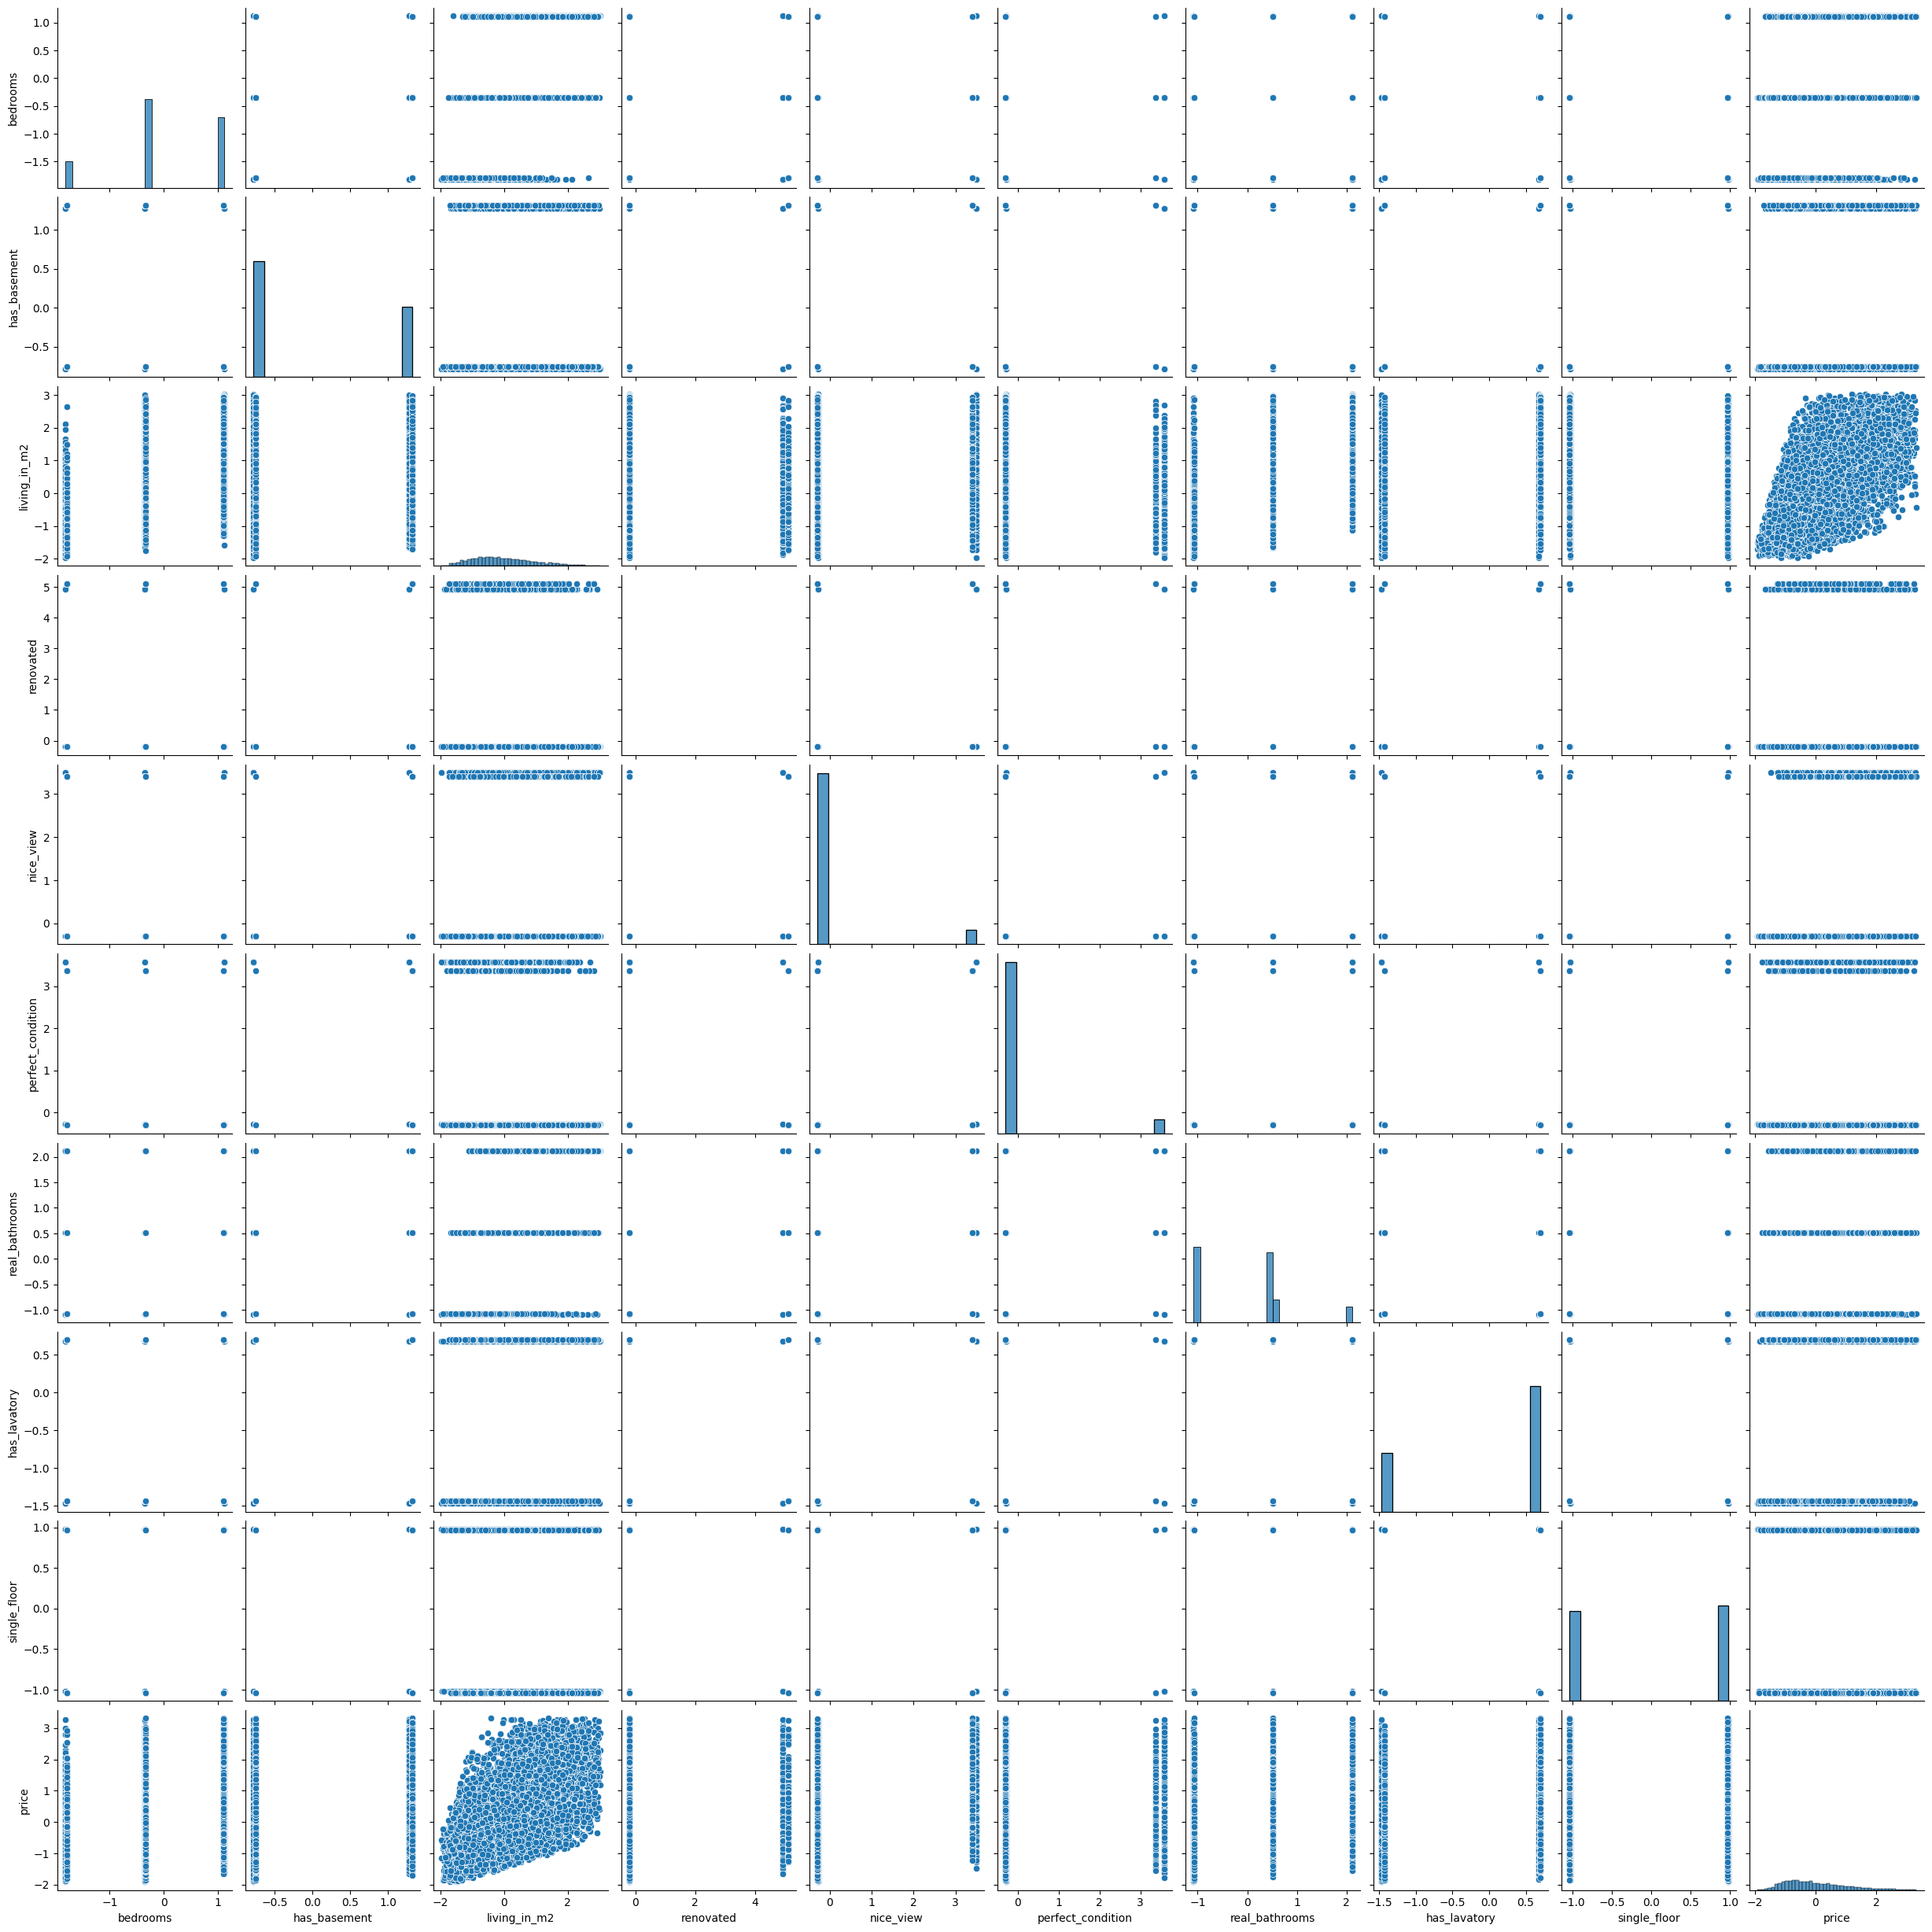

In [ ]:
sns.pairplot(df_nrml)
plt.show()

From the above pairplot it can be concluded that the price and living in m2 has the strongest relationship

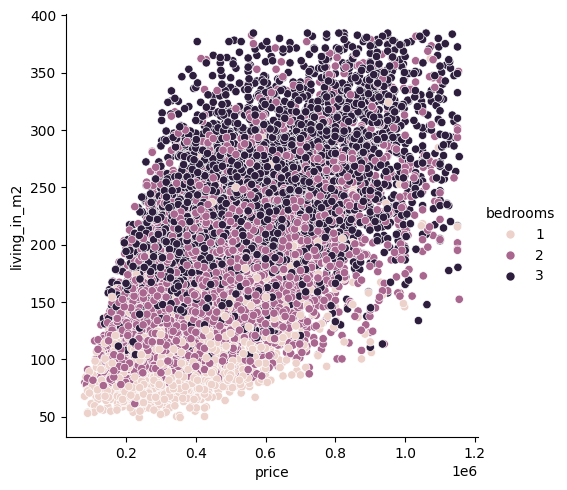

In [ ]:
sns.relplot(x="price",y="living_in_m2",hue="bedrooms",data=df)

<ipython-input-41-d7dbcdc4e35d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

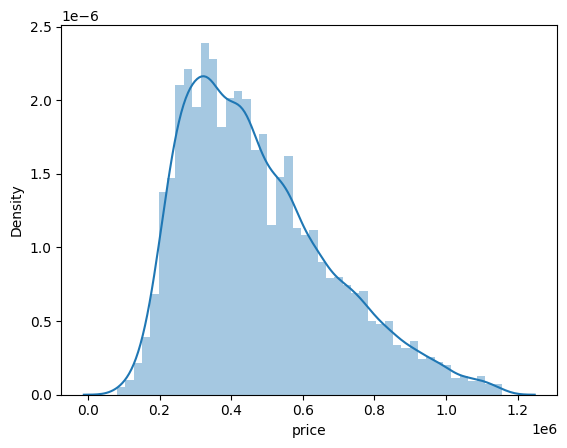

In [ ]:
sns.distplot(df["price"])

Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([[ 0.00514803],
       [-0.10387607],
       [ 0.09574593],
       ...,
       [-0.71833907],
       [-0.36200942],
       [ 0.52733817]])

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
print("Mean Squared Error is",mean_squared_error(y_pred,y_test))
print("Root Mean Squared Error is",np.sqrt(mean_squared_error(y_pred,y_test)))

Mean Squared Error is 0.5703078104061051
Root Mean Squared Error is 0.7551872684348598


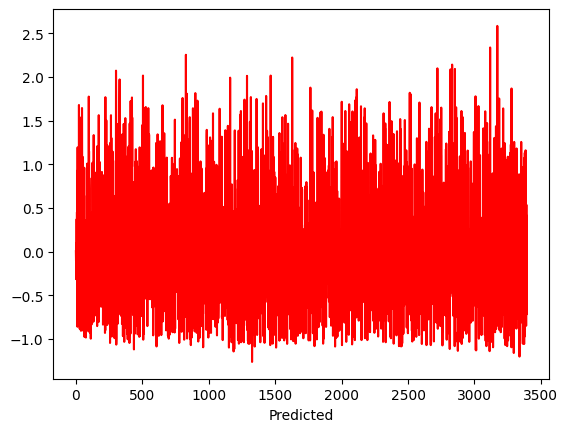

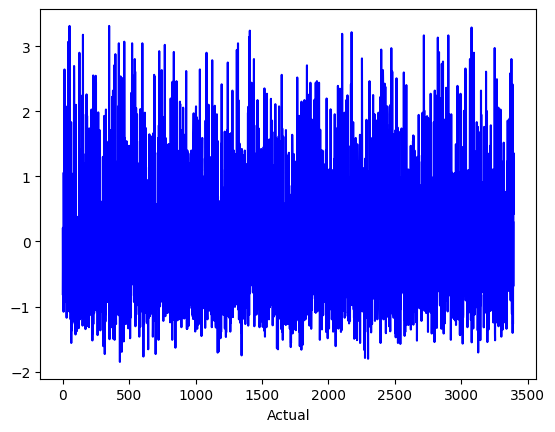

In [ ]:
plt.plot(y_pred,color="red")
plt.xlabel("Predicted")

plt.show()
plt.plot(y_test,color="blue")
plt.xlabel("Actual")
plt.show()

In [ ]:
y_pred=np.array(y_pred)
y_test=np.array(y_test)
y_pred=y_pred.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_pred1=sc_x.inverse_transform(y_pred)
y_test1=sc_x.inverse_transform(y_test)
y_pred1=list(y_pred1)
y_test1=list(y_test1)
df1=pd.DataFrame({"y_pred":y_pred1,"y_test":y_test1})
df1

,y_pred,y_test
0,[473018.820266567],[305000.0]
1,[450527.2838611468],[515000.0]
2,[491709.05507668556],[364500.0]
3,[407759.1213777447],[285000.0]
4,[485664.62039640086],[282000.0]
...,...,...
3390,[558143.682838902],[535000.0]
3391,[542365.2380300676],[330000.0]
3392,[323764.3233616056],[552000.0]
3393,[397274.69006659766],[752000.0]


In [ ]:
print("\nSupport Vector Machine:")
from sklearn.svm import SVR
svm_model = SVR(kernel='rbf')
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print("Mean Squared Error is",mean_squared_error(y_pred,y_test))


Support Vector Machine:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error is 0.5749331339851108


In [ ]:
y_pred=np.array(y_pred)
y_test=np.array(y_test)
y_pred=y_pred.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_pred=sc_x.inverse_transform(y_pred)
y_test=sc_x.inverse_transform(y_test)
y_pred=list(y_pred)
y_test=list(y_test)
df1=pd.DataFrame({"y_pred":y_pred,"y_test":y_test})
df1

,y_pred,y_test
0,[462371.16145233455],[305000.0]
1,[386653.988355647],[515000.0]
2,[439166.3657458272],[364500.0]
3,[404843.32111682073],[285000.0]
4,[402791.7489754338],[282000.0]
...,...,...
3390,[523085.9981889547],[535000.0]
3391,[460217.81921603595],[330000.0]
3392,[350379.84953202313],[552000.0]
3393,[385355.90965712076],[752000.0]


***A data Driven dashboard Created using Excel:***
https://www.canva.com/design/DAGlJv3BFjM/2ADoZ7MEJmWP85sU7qRIAw/edit?utm_content=DAGlJv3BFjM&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton